<a href="https://colab.research.google.com/github/yiyi3681/Data-Science-Challenge/blob/master/Jingyi_Zhang_Data_Science_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Export the excel file from database and use pandas to import as dataframe
import pandas as pd
train = pd.read_excel('./train.xlsx')
train.head()

,image,image class,date,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
0,training-img/flower/flower_79.jpg,flower,2016-04-05 00:00:00,-13.797746,1,132.244709,-14.888019,7059.592259,0.018760,-10.131641,-3.314482,-19.637941,24.774895,0.077676,1,0,-144.078606,367.977834,134340.064080
1,training-img/boat/boat_10.jpg,boat,2017-12-29 00:00:00,1370.968441,0,-53.010396,-0.249638,5404.074707,0.014199,-0.840672,-57.505186,-0.477005,43.993301,4.266039,1,1,-169.232629,215.094104,167657.624550
2,training-img/airplane/airplane_94.jpg,airplane,2016-06-28 00:00:00,1240.615863,1,318.103170,25.234516,6435.785062,0.014366,-4.984576,-0.222097,-9.078957,2.444880,1.035487,1,1,-220.349351,220.027026,157211.302698
3,training-img/boat/boat_79.jpg,boat,2017-05-31 00:00:00,1258.368516,0,221.068821,-5.604373,4915.487849,0.021967,6.189880,-0.732725,2.324312,19.290565,0.206948,0,0,-246.892243,495.729658,-47320.604867
4,training-img/llama/llama_25.jpg,llama,2018-03-29 00:00:00,307.458019,0,259.110856,2.896887,5285.831301,0.014830,-7.544632,-22.701896,3.066921,11.171308,0.530466,1,0,-199.510487,234.047119,-85209.683794


In [0]:
train.shape

(678, 19)

In [0]:
#drop file name and date
str_index = ['image','date']
cat_index = ['image class']
bin_index = ['baz','fyt','lgh']
num_index = [x for x in train.columns if x not in str_index + bin_index + cat_index]
train = train.drop(columns=str_index)

<Figure size 3000x3000 with 0 Axes>

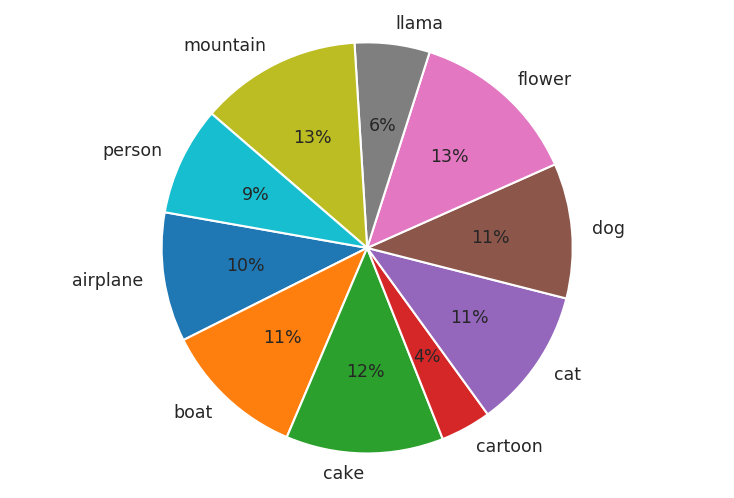

In [0]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import matplotlib as mpl

#plot the count distribution by image class
img_class = train.groupby('image class')['target'].count()
plt.figure(figsize=(15,15))
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.dpi'] = 150
labels = img_class.index
sizes = img_class.values
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=None, labels=labels, autopct='%1.0f%%',radius = 3,
        shadow=False, startangle=170)
ax1.axis('equal') 
proptease = fm.FontProperties()
proptease.set_size('small')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
plt.show()

In [0]:
#mean for all columns by image class
avg = train.groupby('image class').mean()
avg

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
image class,,,,,,,,,,,,,,,,
airplane,273.232189,0.536232,66.590062,1.523467,6000.424272,0.013295,-1.499955,-352.417618,0.623879,25.248084,2.291591,0.536232,0.376812,-271.873565,209.705563,68386.807933
boat,324.386162,0.500000,109.915947,-1.787050,5763.753504,0.014510,-0.037818,-230.720324,2.031714,27.834040,1.988111,0.447368,0.355263,-231.242569,244.113102,80051.436005
cake,356.477794,0.416667,121.045176,0.813364,6028.604279,0.013300,-1.694613,-833.685457,0.301484,27.569042,2.468883,0.476190,0.416667,-219.402964,215.746999,91920.501494
cartoon,166.257855,0.481481,6.930185,2.113340,5812.197556,0.011312,-0.692668,-101.675397,1.162782,21.548553,4.451190,0.222222,0.481481,-272.123660,157.916034,85461.399818
cat,225.053897,0.480000,76.827432,-0.685512,6218.254596,0.013604,-0.299152,-1900.365462,1.111782,29.110189,4.821276,0.466667,0.346667,-223.611783,221.173177,62912.673324
dog,269.125977,0.444444,73.176577,0.864567,5926.715360,0.013631,-0.200415,-309.334662,-1.370367,28.550745,3.129645,0.402778,0.388889,-259.500832,221.757335,74492.275955
flower,222.715549,0.571429,97.563157,0.619017,5908.150399,0.013967,-1.910003,-507.534739,-1.073333,27.766817,3.505214,0.527473,0.351648,-287.331701,226.122653,84855.581189
llama,216.443166,0.450000,99.985772,0.823591,5921.662636,0.012529,1.236514,-7089.276556,0.738235,28.278490,2.259483,0.525000,0.300000,-266.724259,188.722291,79292.123362
mountain,215.265367,0.476744,103.867052,-0.371159,6033.448490,0.013668,-0.713289,-1966.903928,-1.627975,29.084692,2.232079,0.488372,0.279070,-241.724279,227.205515,67072.927685


In [0]:
#variance for all columns by image class
var = train.groupby('image class').var()
var

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
image class,,,,,,,,,,,,,,,,
airplane,196511.742284,0.252344,38477.662336,118.192030,9.670349e+05,0.000023,128.236636,1.992569e+06,98.577035,157.426749,25.525552,0.252344,0.238278,29486.278488,21988.588873,1.718727e+10
boat,253677.473731,0.253333,33343.421072,113.828846,1.004401e+06,0.000022,107.334629,1.566547e+05,97.535561,113.428075,12.157138,0.250526,0.232105,32920.922175,18108.917788,1.932197e+10
cake,257971.350807,0.245984,50164.423697,116.616496,9.238153e+05,0.000028,81.284825,1.620943e+07,125.496015,163.513856,29.143777,0.252438,0.245984,30968.953121,18560.356699,2.385166e+10
cartoon,148574.843846,0.259259,44991.743010,108.357457,7.436779e+05,0.000021,79.215737,5.380357e+04,118.070313,173.890183,197.249125,0.179487,0.259259,26098.981763,12830.722336,2.174998e+10
cat,172100.349227,0.252973,41058.720354,86.234091,8.276303e+05,0.000025,106.761913,4.610161e+07,116.158427,153.229168,121.131691,0.252252,0.229550,24769.234072,20062.708870,1.996158e+10
dog,196147.129307,0.250391,48515.654275,97.753800,8.955941e+05,0.000025,84.590262,1.459688e+06,74.877121,174.643624,88.099434,0.243936,0.241002,24596.200166,21560.264464,2.384970e+10
flower,191103.681017,0.247619,32329.062372,125.967982,8.064737e+05,0.000019,127.099693,3.436718e+06,107.410151,204.667580,131.335153,0.252015,0.230525,33333.815917,15604.762572,1.685969e+10
llama,135748.881022,0.253846,23568.762963,125.145890,8.215912e+05,0.000022,136.118759,1.726064e+09,99.390207,197.960962,9.175353,0.255769,0.215385,22704.454663,15887.325740,1.625042e+10
mountain,161752.526039,0.252394,41811.279955,126.799697,8.911536e+05,0.000030,77.844802,1.076296e+08,112.159047,137.690852,12.326704,0.252804,0.203557,23916.218359,24012.901099,2.029898e+10


In [0]:
#pearson correlation
train_num = train[num_index]
corr = train_num.corr()
corr

,bar,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,hrt,juu,target
bar,1.000000,0.027032,0.031546,-0.013467,0.075022,0.057385,0.001702,0.068449,0.048284,-0.032158,0.039174,0.073569,0.058495
xgt,0.027032,1.000000,-0.005438,-0.051937,0.002951,-0.016945,-0.010104,-0.070430,-0.028626,0.049785,0.069890,0.004328,0.059559
qgg,0.031546,-0.005438,1.000000,-0.007552,-0.026951,0.071375,0.023173,0.004620,0.031262,-0.019018,0.038730,-0.023016,-0.015258
lux,-0.013467,-0.051937,-0.007552,1.000000,-0.010830,0.074745,-0.037707,-0.015388,0.018396,-0.005906,-0.035841,-0.000869,0.033065
wsg,0.075022,0.002951,-0.026951,-0.010830,1.000000,-0.013653,0.007109,-0.010421,-0.011562,0.007430,0.034911,0.974137,-0.000386
yyz,0.057385,-0.016945,0.071375,0.074745,-0.013653,1.000000,0.064751,0.087856,0.063709,-0.025411,-0.016653,-0.022965,-0.014862
drt,0.001702,-0.010104,0.023173,-0.037707,0.007109,0.064751,1.000000,-0.079854,-0.050729,0.000341,-0.011903,0.005409,0.001962
gox,0.068449,-0.070430,0.004620,-0.015388,-0.010421,0.087856,-0.079854,1.000000,-0.078671,0.040285,0.033754,-0.007036,-0.011707
foo,0.048284,-0.028626,0.031262,0.018396,-0.011562,0.063709,-0.050729,-0.078671,1.000000,0.006327,0.013550,-0.018235,-0.011086
boz,-0.032158,0.049785,-0.019018,-0.005906,0.007430,-0.025411,0.000341,0.040285,0.006327,1.000000,0.023467,0.010527,0.033299


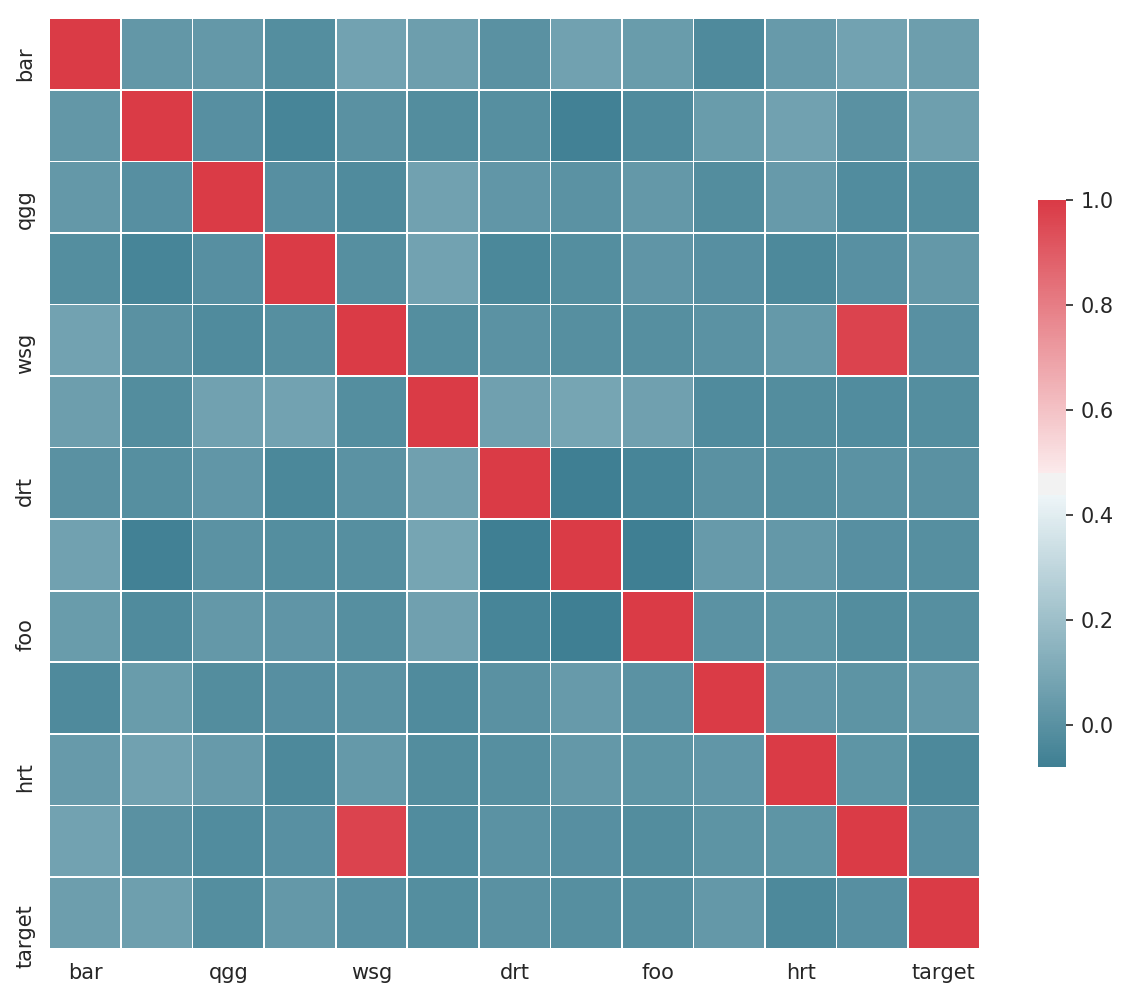

In [0]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(10, 10)) 
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(corr, cmap=cmap, vmax=1.0, square=True, xticklabels=2, yticklabels=2, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax) 
plt.show()

juu & wsg has strong correlation

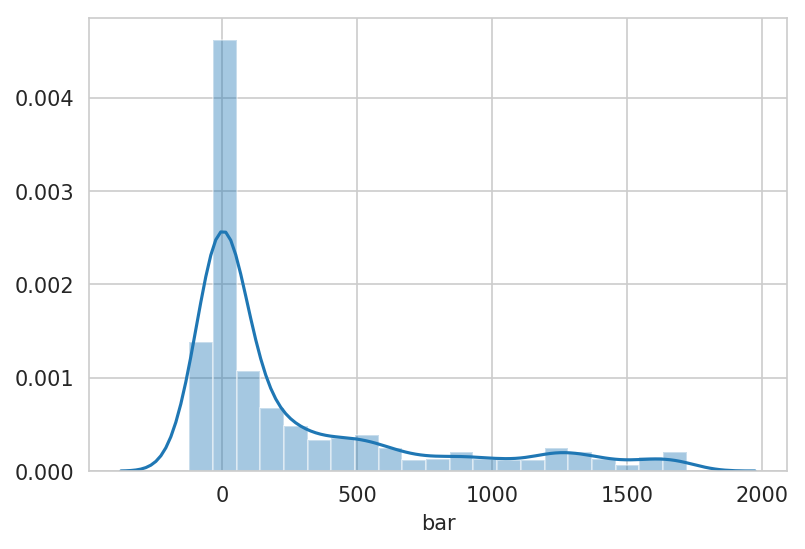

In [0]:
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(train['bar'])

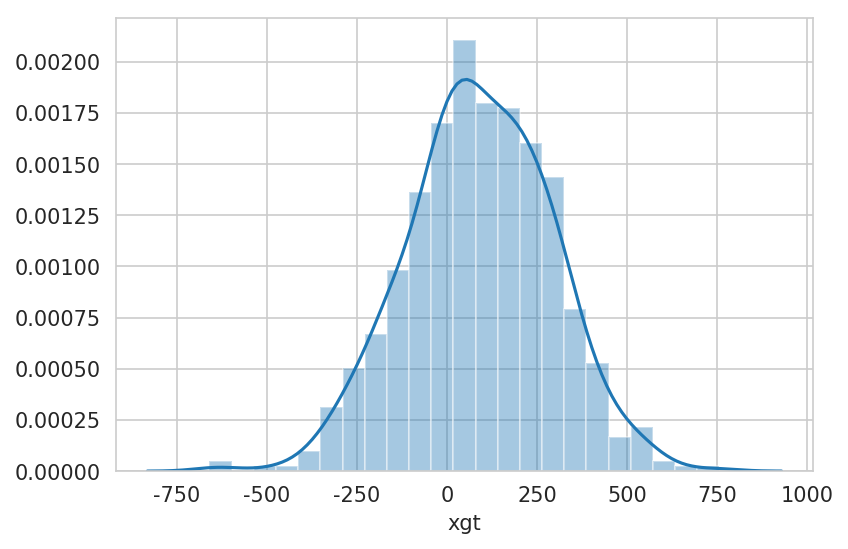

In [0]:
sns.distplot(train['xgt'])

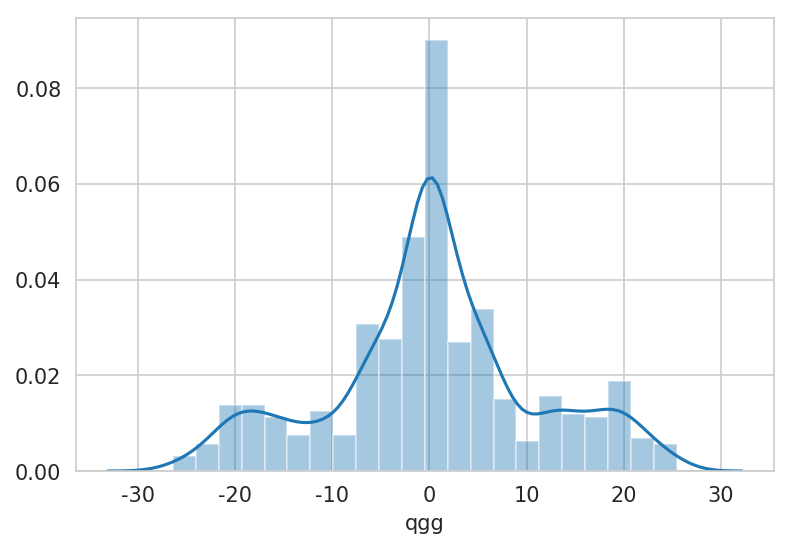

In [0]:
sns.distplot(train['qgg'])

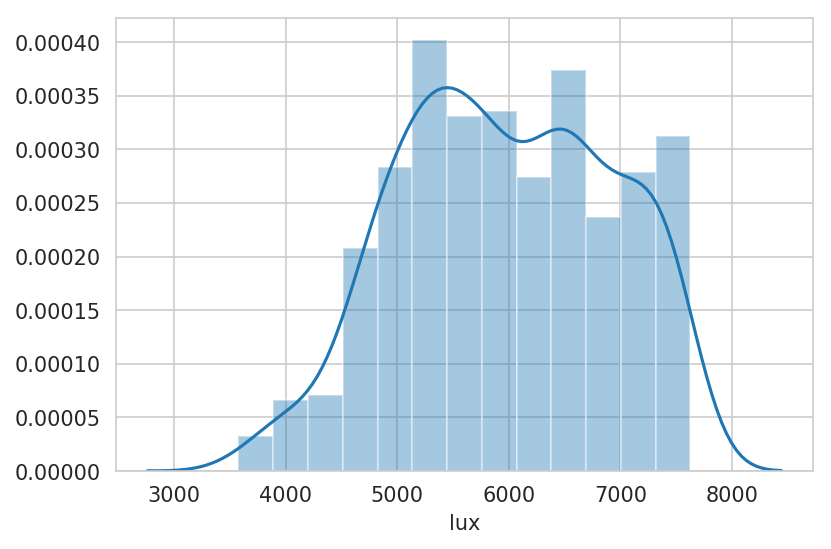

In [0]:
sns.distplot(train['lux'])

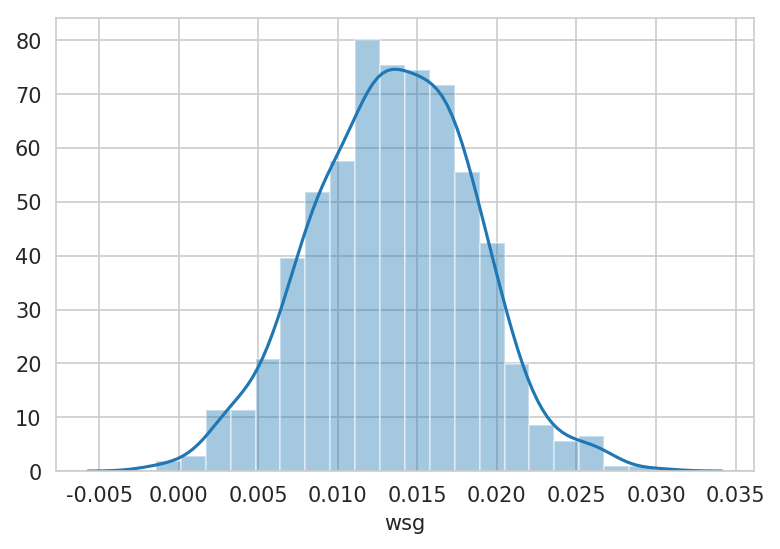

In [0]:
sns.distplot(train['wsg'])

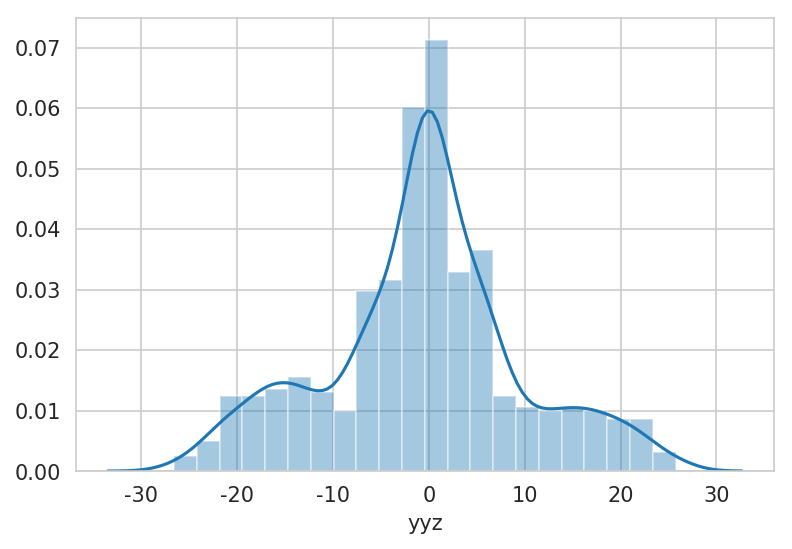

In [0]:
sns.distplot(train['yyz'])

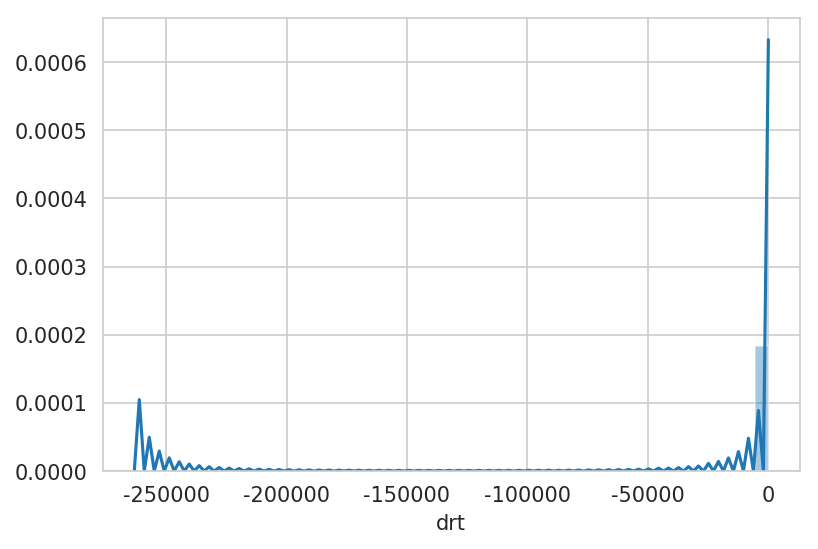

In [0]:
sns.distplot(train['drt'])

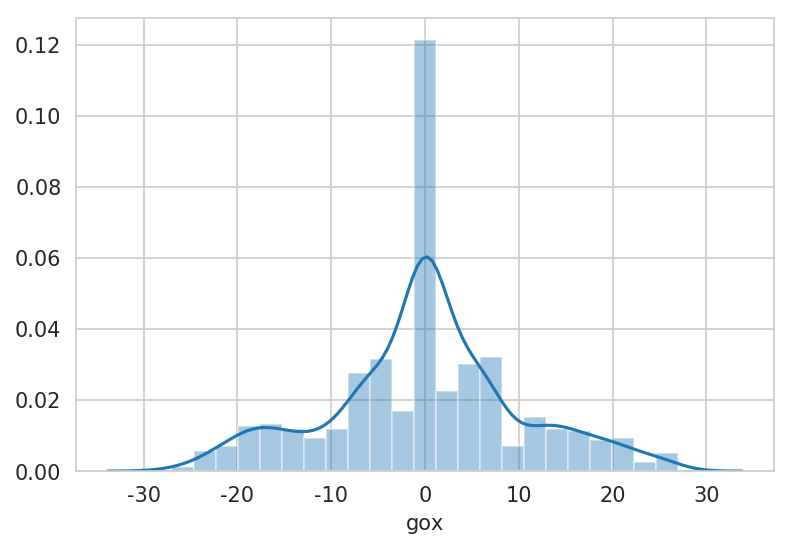

In [0]:
sns.distplot(train['gox'])

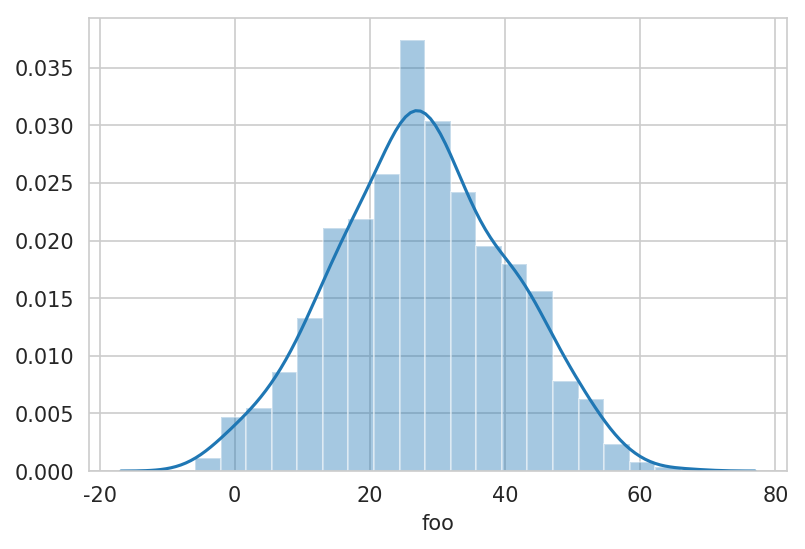

In [0]:
sns.distplot(train['foo'])

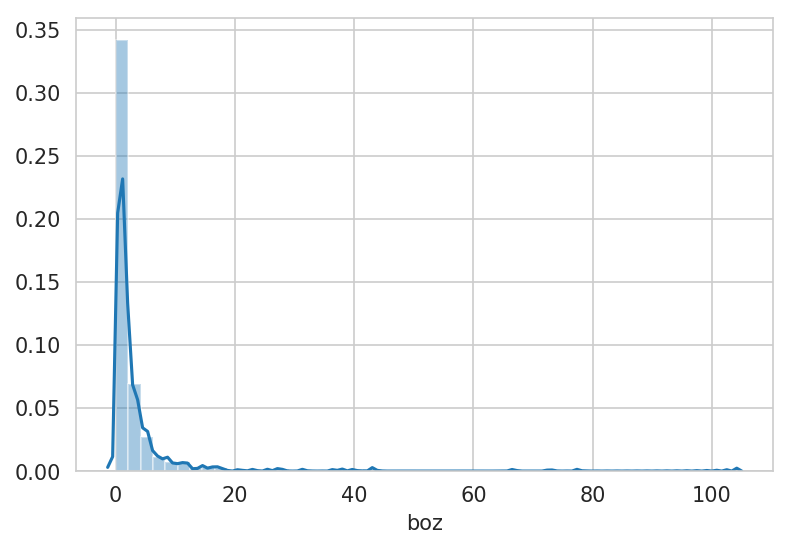

In [0]:
sns.distplot(train['boz'])

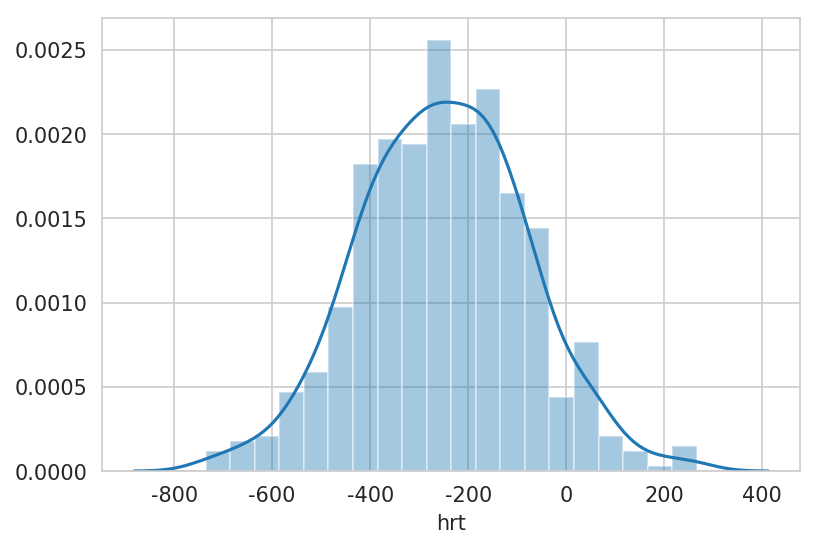

In [0]:
sns.distplot(train['hrt'])

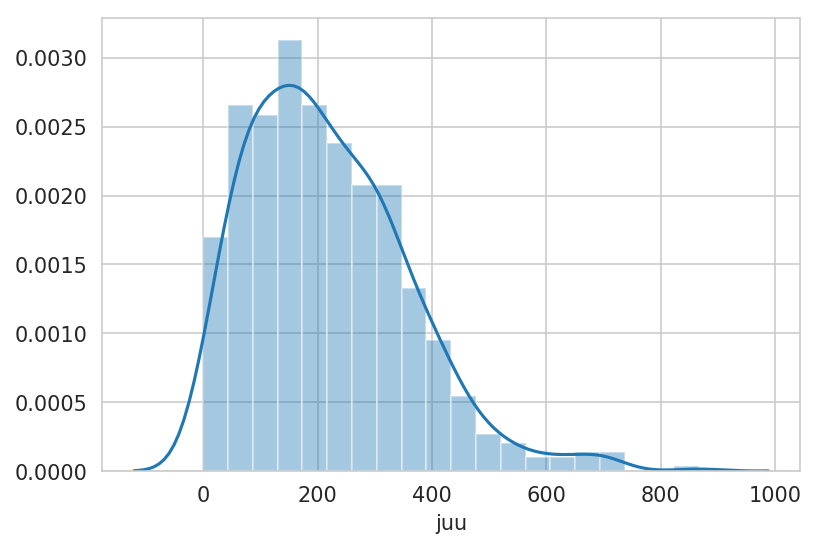

In [0]:
sns.distplot(train['juu'])

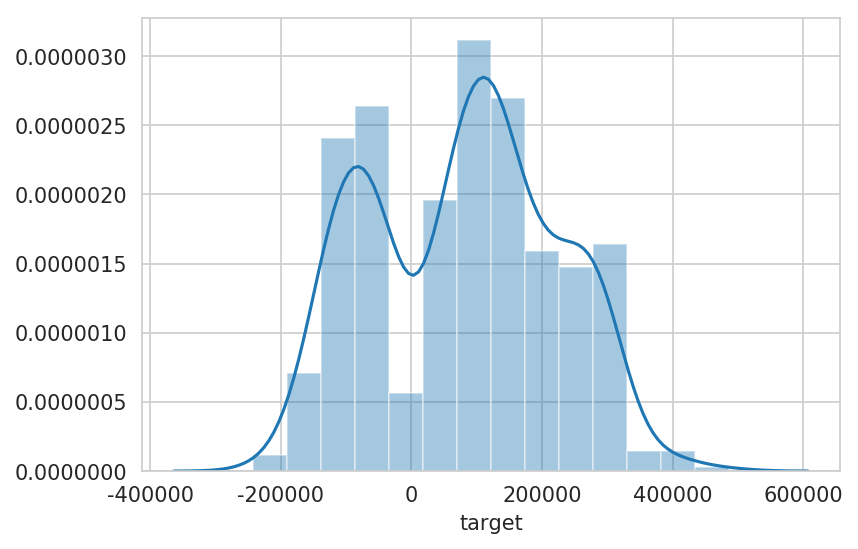

In [0]:
sns.distplot(train['target'])

<Figure size 2250x2250 with 0 Axes>

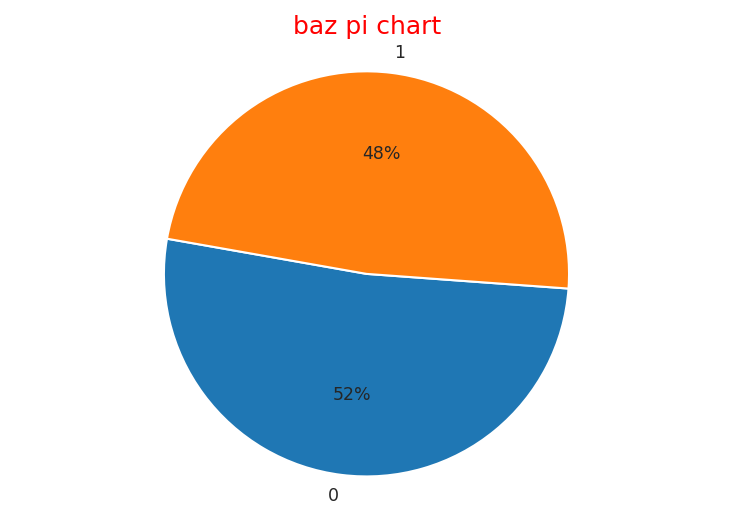

In [0]:
baz_pi = train.groupby('baz')['target'].count()
plt.figure(figsize=(15,15))
labels = baz_pi.index
sizes = baz_pi.values
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=None, labels=labels, autopct='%1.0f%%',radius = 3,
        shadow=False, startangle=170)
ax1.axis('equal') 
ax1.set_title('baz pi chart',fontsize=12,color='r')
proptease = fm.FontProperties()
proptease.set_size('small')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
plt.show()

<Figure size 2250x2250 with 0 Axes>

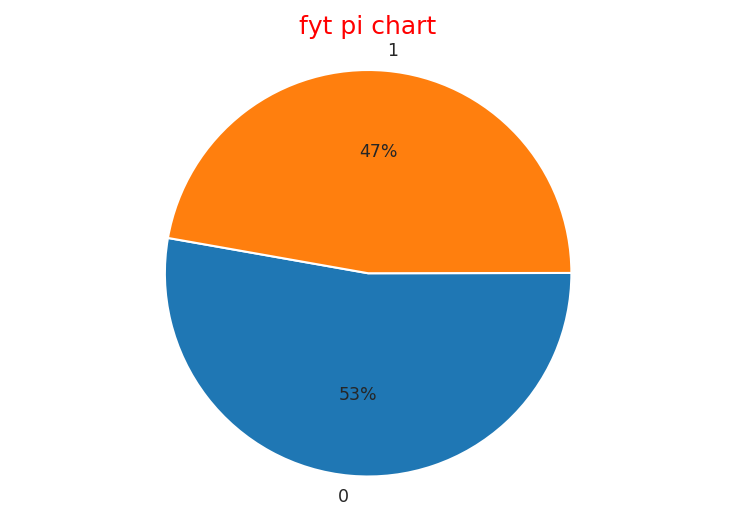

In [0]:
fyt_pi = train.groupby('fyt')['target'].count()
plt.figure(figsize=(15,15))
labels = fyt_pi.index
sizes = fyt_pi.values
fig2, ax2 = plt.subplots()
patches, texts, autotexts = ax2.pie(sizes, explode=None, labels=labels, autopct='%1.0f%%',radius = 3,
        shadow=False, startangle=170)
ax2.axis('equal') 
ax2.set_title('fyt pi chart',fontsize=12,color='r')
proptease = fm.FontProperties()
proptease.set_size('small')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
plt.show()

<Figure size 2250x2250 with 0 Axes>

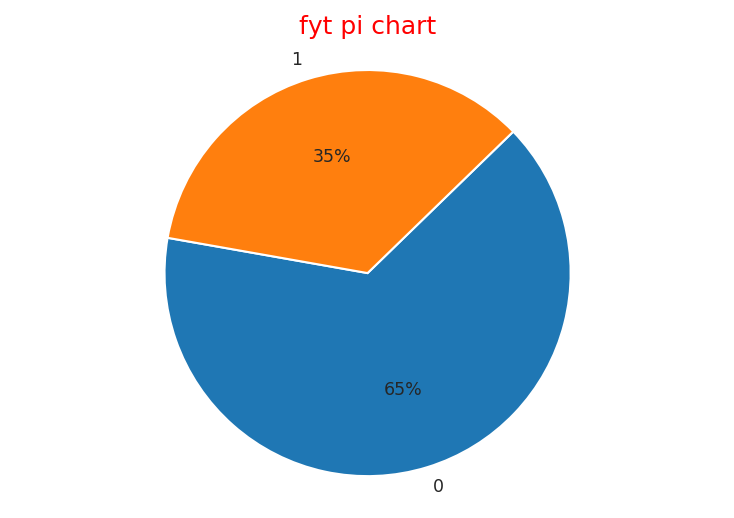

In [0]:
lgh_pi = train.groupby('lgh')['target'].count()
plt.figure(figsize=(15,15))
labels = lgh_pi.index
sizes = lgh_pi.values
fig3, ax3 = plt.subplots()
patches, texts, autotexts = ax3.pie(sizes, explode=None, labels=labels, autopct='%1.0f%%',radius = 3,
        shadow=False, startangle=170)
ax3.axis('equal') 
ax3.set_title('fyt pi chart',fontsize=12,color='r')
proptease = fm.FontProperties()
proptease.set_size('small')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
plt.show()

Apparently, column bar, drt, boz, juu need to implement outlier detection.

# Outlier Detection:
1. boxplot

In [0]:
import seaborn as sns
import numpy as np
def box_plot(input):
  sns.set_style('whitegrid')
  sns.boxplot(input,orient='v')
  lq,uq=np.percentile(input,[25,75])
  lower_l=lq - 1.5*(uq-lq)
  upper_l=uq + 1.5*(uq-lq)
  inlier_index = input[(input >=lower_l)&(input<=upper_l)].index.tolist()
  outlier_counts = len(input) - len(remain_index)
  print('outlier counts: ' + str(outlier_counts))
  return remain_index 

outlier counts: 77


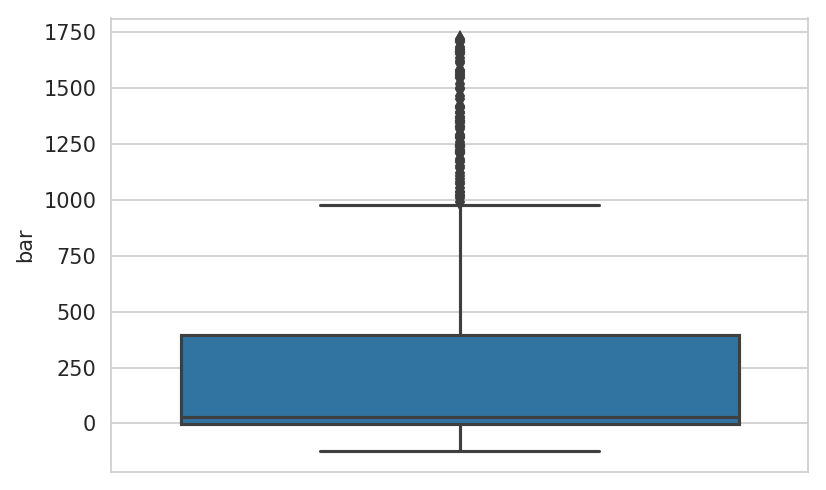

In [0]:
i1 = box_plot(train['bar'])

outlier counts: 111


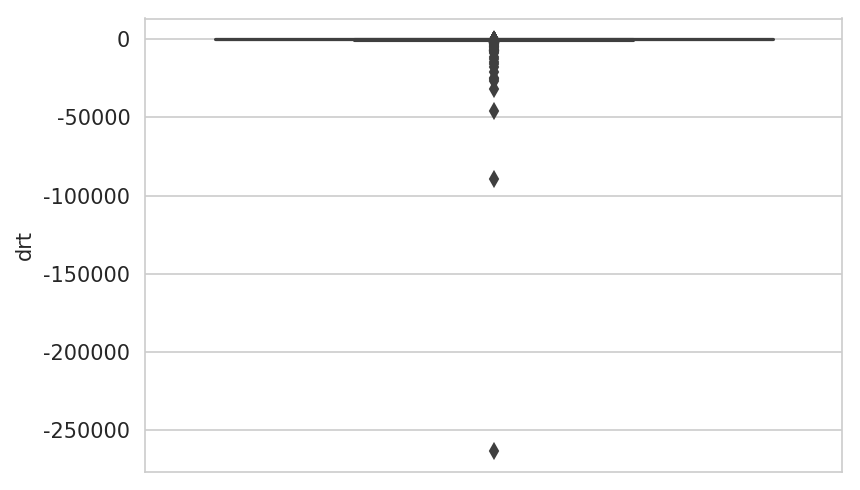

In [0]:
i2 = box_plot(train['drt'])

outlier counts: 67


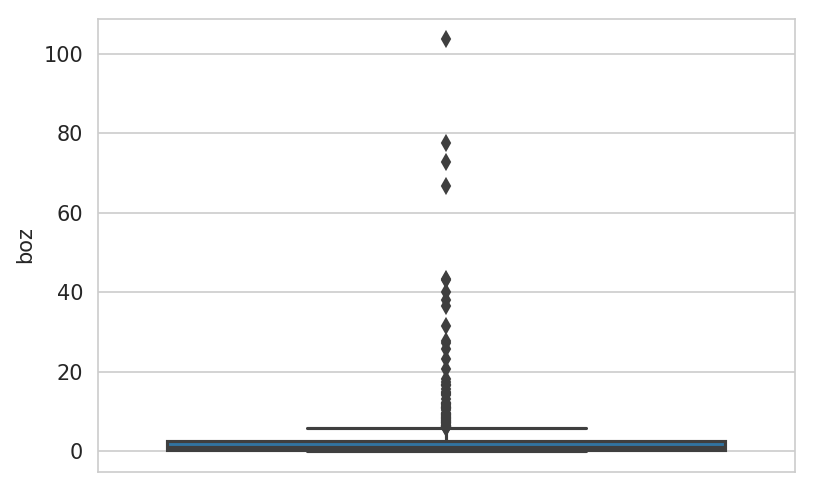

In [0]:
i3 = box_plot(train['boz'])

outlier counts: 12


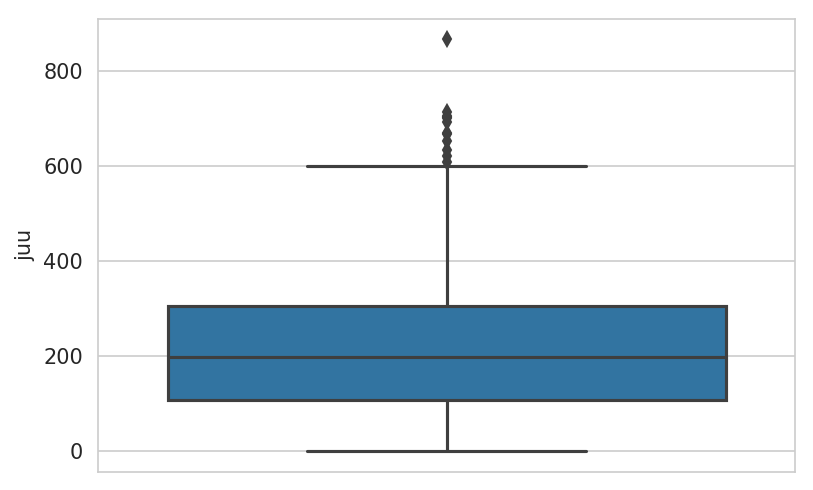

In [0]:
i4 = box_plot(train['juu'])

In [0]:
r1 = list(set(i1).intersection(i2))
r2 = list(set(r1).intersection(i3))
r3 = list(set(r2).intersection(i4))
out = list(set(train.index.tolist()).difference(set(r3)))
print('outlier rows: ' + str(out))
print('outlier rows: ' + str(len(out)))

outlier rows: [1, 2, 3, 513, 5, 514, 8, 9, 521, 12, 13, 524, 526, 19, 531, 533, 24, 538, 27, 539, 540, 30, 541, 545, 34, 35, 36, 547, 549, 40, 41, 553, 554, 45, 557, 47, 48, 49, 558, 560, 561, 564, 54, 55, 56, 57, 565, 569, 571, 572, 62, 575, 65, 66, 67, 577, 578, 580, 581, 582, 583, 74, 75, 585, 589, 78, 590, 591, 88, 91, 92, 603, 604, 605, 610, 611, 101, 102, 615, 105, 107, 621, 110, 111, 113, 117, 632, 121, 634, 125, 638, 639, 129, 130, 641, 642, 135, 649, 651, 140, 142, 655, 656, 145, 657, 658, 660, 149, 150, 661, 663, 664, 665, 155, 156, 669, 160, 161, 162, 163, 673, 165, 166, 167, 676, 171, 175, 176, 179, 182, 184, 189, 193, 199, 200, 206, 210, 216, 219, 227, 228, 234, 235, 237, 238, 243, 250, 252, 254, 255, 261, 268, 269, 270, 274, 277, 280, 286, 288, 289, 297, 302, 305, 309, 312, 313, 314, 318, 323, 327, 334, 336, 337, 338, 342, 346, 349, 351, 353, 357, 361, 363, 364, 366, 368, 370, 371, 373, 374, 379, 381, 382, 385, 388, 390, 392, 393, 400, 402, 403, 404, 407, 412, 423, 425, 4

In [0]:
outliers_box = train.iloc[out,:]
outliers_box

,image class,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
1,boat,1370.968441,0,-53.010396,-0.249638,5404.074707,0.014199,-0.840672,-57.505186,-0.477005,43.993301,4.266039,1,1,-169.232629,215.094104,167657.624550
2,airplane,1240.615863,1,318.103170,25.234516,6435.785062,0.014366,-4.984576,-0.222097,-9.078957,2.444880,1.035487,1,1,-220.349351,220.027026,157211.302698
3,boat,1258.368516,0,221.068821,-5.604373,4915.487849,0.021967,6.189880,-0.732725,2.324312,19.290565,0.206948,0,0,-246.892243,495.729658,-47320.604867
513,mountain,246.073825,1,324.633587,21.138493,5545.421242,0.009979,15.244041,-0.417014,-8.012531,50.350116,8.249096,0,0,-161.734501,107.691171,115645.291344
5,cake,451.983142,0,174.338815,10.095626,6640.632763,0.004286,18.094218,-606.445127,17.733978,25.465547,0.185603,0,0,-378.051879,20.082792,126100.528933
514,boat,941.122839,0,37.032033,-0.600171,4764.877588,0.015322,-0.552175,-1746.020581,0.569486,47.721416,14.191931,0,0,-335.319695,249.353684,241534.040561
8,cartoon,226.960903,0,81.079297,18.743123,5667.941494,0.009699,12.728586,-83.509638,14.882528,35.885082,8.908963,0,1,-231.326207,101.807767,139155.760143
9,boat,274.333520,1,118.108062,22.517059,5442.324932,0.025078,9.288192,-1549.924452,12.681217,30.028803,1.903592,0,0,-369.157556,633.379261,85836.688182
521,airplane,1659.868173,0,-64.203439,6.747140,5532.601549,0.025820,-2.755251,-20.758400,-4.623147,28.497027,0.503224,1,0,-540.457262,667.970297,-96179.060316
12,cake,247.277638,1,459.853572,11.659218,6677.687669,0.012615,-6.530166,-548.775775,23.680053,7.654429,1.316817,1,0,-159.570835,170.757346,170290.827423


2. LOF detection

In [0]:
def localoutlierfactor(data, predict, k):
    from sklearn.neighbors import LocalOutlierFactor
    clf = LocalOutlierFactor(n_neighbors=k + 1, algorithm='auto', contamination=0.1, n_jobs=-1)
    clf.fit(data)
    predict['k distances'] = clf.kneighbors(predict)[0].max(axis=1)
    predict['local outlier factor'] = -clf._decision_function(predict.iloc[:, :-1])
    return predict

def plot_lof(result, method):
    import matplotlib.pyplot as plt
    plt.rcParams['axes.unicode_minus'] = False  
    plt.figure(figsize=(8, 4)).add_subplot(111)
    plt.scatter(result[result['local outlier factor'] > method].index,
                result[result['local outlier factor'] > method]['local outlier factor'], c='red', s=50,
                marker='.', alpha=None,
                label='outlier')
    plt.scatter(result[result['local outlier factor'] <= method].index,
                result[result['local outlier factor'] <= method]['local outlier factor'], c='black', s=50,
                marker='.', alpha=None, label='inlier')
    plt.hlines(method, -2, 2 + max(result.index), linestyles='--')
    plt.xlim(-2, 2 + max(result.index))
    plt.title('LOF local outlier detection', fontsize=13)
    plt.ylabel('local outlier factor', fontsize=15)
    plt.legend()
    plt.show()

def lof(data, predict=None, k=5, method=1, plot=False):
    import pandas as pd
    try:
        if predict == None:
            predict = data.copy()
    except Exception:
        pass
    predict = pd.DataFrame(predict)
    predict = localoutlierfactor(data, predict, k)
    if plot == True:
        plot_lof(predict, method)
    outliers = predict[predict['local outlier factor'] > method].sort_values(by='local outlier factor')
    inliers = predict[predict['local outlier factor'] <= method].sort_values(by='local outlier factor')
    return outliers, inliers

In [0]:
train1 = pd.get_dummies(train, columns = cat_index)
train1 = train1.drop(columns = ['target'])
train1 = 1.0*(train1-train1.mean())/train1.std()
train1.columns.values

array(['bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz', 'drt', 'gox',
       'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu', 'image class_airplane',
       'image class_boat', 'image class_cake', 'image class_cartoon',
       'image class_cat', 'image class_dog', 'image class_flower',
       'image class_llama', 'image class_mountain', 'image class_person'],
      dtype=object)

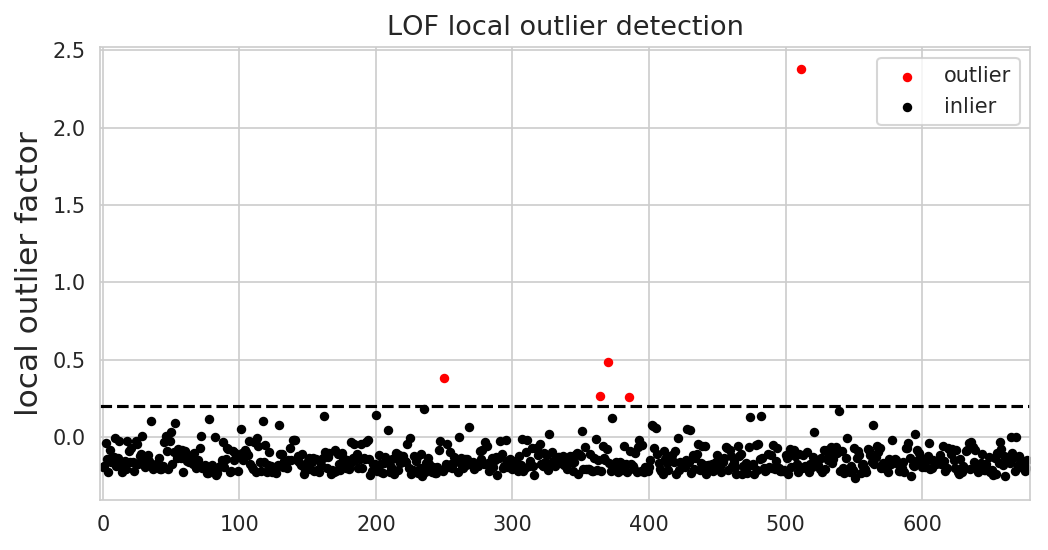

In [0]:
outliers1, inliers1 = lof(train1, k=5, method = 0.2,plot=True)

In [0]:
outliers1

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,image class_airplane,image class_boat,image class_cake,image class_cartoon,image class_cat,image class_dog,image class_flower,image class_llama,image class_mountain,image class_person,k distances,local outlier factor
385,0.008550,-0.967347,0.156438,-0.409266,0.538266,2.588063,-2.432268,0.105469,-0.685625,-0.533162,4.332563,-0.944741,1.363090,-0.851373,3.386641,2.968681,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631,6.943457,0.256926
364,0.748216,-0.967347,0.213725,0.061164,0.577746,-0.696439,0.032498,0.105827,-0.036710,0.906420,4.757523,-0.944741,-0.732545,1.870972,-0.775887,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,3.267092,5.901320,0.263768
250,3.044436,-0.967347,0.705732,-1.483534,-0.165415,-0.069474,-0.497576,-4.053847,2.144129,-0.203532,1.540100,-0.944741,-0.732545,0.603120,-0.231641,-0.336353,-0.355049,-0.375773,-0.203503,2.833398,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631,6.249342,0.379007
370,-0.483133,-0.967347,0.979630,0.099859,-1.116488,-1.128898,-0.215400,-7.954316,2.631641,1.359227,-0.366318,1.056929,-0.732545,1.092693,-1.070789,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,2.621749,-0.305631,8.745591,0.487402
511,-0.386962,-0.967347,-0.327470,-1.020637,1.324380,0.628047,-2.079043,-23.567743,1.200698,0.784579,-0.333705,1.056929,1.363090,-0.100522,0.526710,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,3.990799,-0.380862,-0.305631,22.810637,2.381727


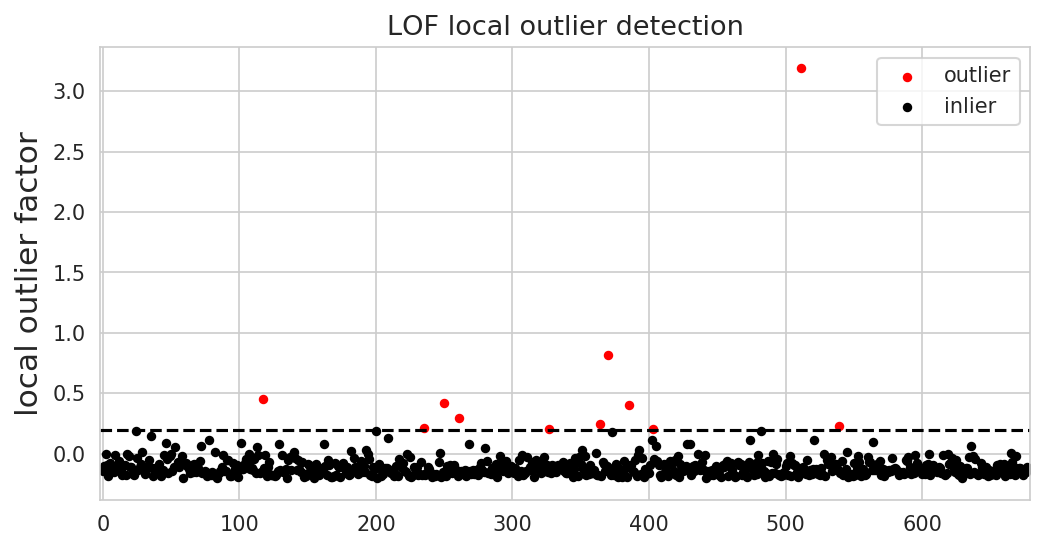

In [0]:
outliers2, inliers2 = lof(train1, k=10, method = 0.2,plot=True)

In [0]:
outliers2

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,image class_airplane,image class_boat,image class_cake,image class_cartoon,image class_cat,image class_dog,image class_flower,image class_llama,image class_mountain,image class_person,k distances,local outlier factor
327,-0.361552,1.032230,-0.411040,0.410473,1.295323,-0.963856,0.376055,-1.050348,0.590521,-1.442965,5.169587,1.056929,1.363090,0.285364,-0.966194,-0.336353,-0.355049,-0.375773,-0.203503,2.833398,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631,6.137703,0.201455
403,-0.594408,1.032230,1.733118,0.043883,1.748862,-1.138788,0.105162,0.090698,0.038611,1.075541,8.199237,1.056929,-0.732545,0.922881,-1.076742,-0.336353,-0.355049,-0.375773,-0.203503,2.833398,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631,8.088928,0.204305
235,-0.598356,1.032230,-1.428881,-0.723838,-0.292064,-0.011025,-0.225770,0.041515,-0.297372,0.290796,4.519381,-0.944741,-0.732545,0.099042,-0.174110,-0.336353,-0.355049,2.657254,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631,5.625577,0.215494
539,-0.419887,-0.967347,-0.453490,-0.881279,-0.255743,0.217906,-0.384525,0.061633,2.459730,-1.420667,5.182715,-0.944741,1.363090,1.155816,0.062009,-0.336353,-0.355049,-0.375773,-0.203503,2.833398,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631,6.543697,0.228956
364,0.748216,-0.967347,0.213725,0.061164,0.577746,-0.696439,0.032498,0.105827,-0.036710,0.906420,4.757523,-0.944741,-0.732545,1.870972,-0.775887,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,3.267092,6.189678,0.246128
261,-0.685129,1.032230,0.980978,-0.061278,-0.726970,0.235619,-0.008904,0.105506,-0.072346,0.535088,8.993695,1.056929,1.363090,0.521909,0.080984,-0.336353,-0.355049,-0.375773,4.906684,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631,8.996122,0.298400
385,0.008550,-0.967347,0.156438,-0.409266,0.538266,2.588063,-2.432268,0.105469,-0.685625,-0.533162,4.332563,-0.944741,1.363090,-0.851373,3.386641,2.968681,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631,7.149903,0.404767
250,3.044436,-0.967347,0.705732,-1.483534,-0.165415,-0.069474,-0.497576,-4.053847,2.144129,-0.203532,1.540100,-0.944741,-0.732545,0.603120,-0.231641,-0.336353,-0.355049,-0.375773,-0.203503,2.833398,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631,6.566703,0.416023
117,-0.626004,1.032230,0.857443,-0.342345,-1.051391,0.978897,0.325013,0.105719,0.705753,-1.076828,12.958368,-0.944741,1.363090,-1.180801,0.964716,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,2.537919,-0.250207,-0.380862,-0.305631,11.038147,0.456943
370,-0.483133,-0.967347,0.979630,0.099859,-1.116488,-1.128898,-0.215400,-7.954316,2.631641,1.359227,-0.366318,1.056929,-0.732545,1.092693,-1.070789,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,2.621749,-0.305631,9.104670,0.820646


3. Isolation Forest

In [0]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(behaviour='new', max_samples=100, contamination='auto')
clf.fit(train1)
predict = clf.predict(train1).tolist()

In [0]:
outliers_index = [i for i,x in enumerate(predict) if x == -1]
outliers = train1.iloc[outliers_index,:]
outliers

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,image class_airplane,image class_boat,image class_cake,image class_cartoon,image class_cat,image class_dog,image class_flower,image class_llama,image class_mountain,image class_person
9,0.003811,1.032230,0.137747,2.091978,-0.560840,2.331682,0.962096,-0.033620,1.235792,0.180788,-0.132518,-0.944741,-0.732545,-0.699391,2.961044,-0.336353,2.812360,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
35,-0.457608,-0.967347,2.150635,1.097349,0.630414,-2.396984,-1.511672,0.105342,1.745683,-0.726105,2.290713,1.056929,-0.732545,-1.686339,-1.536139,-0.336353,-0.355049,2.657254,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
46,0.921681,1.032230,-0.447801,-2.313544,-1.326370,0.422263,-0.747317,0.087365,0.917718,1.788816,-0.273973,-0.944741,1.363090,3.022104,0.286994,-0.336353,-0.355049,2.657254,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
47,-0.750101,-0.967347,0.361276,1.886588,-0.167941,-0.742928,1.202277,-1.202550,-1.340377,-0.551574,-0.281237,-0.944741,1.363090,-1.028012,-0.810803,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,2.537919,-0.250207,-0.380862,-0.305631
58,0.127723,-0.967347,0.748363,-2.119426,-1.034909,-1.914628,-0.919733,0.104356,-1.074759,0.665999,-0.327671,-0.944741,1.363090,1.854146,-1.430693,-0.336353,-0.355049,2.657254,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
82,-0.418624,1.032230,0.309787,-0.907751,1.307325,2.140560,-1.933545,0.097336,1.401345,-0.550924,-0.306110,1.056929,-0.732545,-0.697044,2.652557,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,3.990799,-0.380862,-0.305631
88,0.844170,1.032230,-0.537783,-1.712190,-0.866256,0.488028,-1.851977,0.104928,0.814346,-1.356452,1.157119,-0.944741,1.363090,0.364805,0.362186,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,3.990799,-0.380862,-0.305631
92,1.773547,-0.967347,-0.520651,-1.626556,-0.356811,-0.047123,-1.122380,-0.703567,-1.771700,2.253612,-0.131373,1.056929,-0.732545,-0.549920,-0.209775,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,2.537919,-0.250207,-0.380862,-0.305631
105,0.767708,-0.967347,0.291348,1.895915,-1.812978,-0.614840,-0.762835,0.105816,-1.515791,1.189394,0.821208,-0.944741,-0.732545,1.671880,-0.712756,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,2.899009,-0.393442,-0.250207,-0.380862,-0.305631
113,-0.462917,-0.967347,-1.092566,0.740581,-0.194471,-1.642077,-1.627429,0.102648,1.923419,-1.614892,1.948373,1.056929,-0.732545,1.415381,-1.332008,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,2.899009,-0.393442,-0.250207,-0.380862,-0.305631


In [0]:
print('counts of outliers of isolation forest: ' + str(len(outliers)))

counts of outliers of isolation forest: 33


4. One Class SVM

In [0]:
from sklearn import svm
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(train1)
predict2 = clf.predict(train1).tolist()
outliers_index2 = [i for i,x in enumerate(predict2) if x == -1]
outliers2 = train1.iloc[outliers_index2,:]
outliers2

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,image class_airplane,image class_boat,image class_cake,image class_cartoon,image class_cat,image class_dog,image class_flower,image class_llama,image class_mountain,image class_person
7,0.129867,1.032230,0.293163,0.022283,-1.343480,0.928638,0.134688,0.105220,-0.038321,1.306520,-0.317515,1.056929,-0.732545,2.432183,0.899766,-0.336353,2.812360,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
9,0.003811,1.032230,0.137747,2.091978,-0.560840,2.331682,0.962096,-0.033620,1.235792,0.180788,-0.132518,-0.944741,-0.732545,-0.699391,2.961044,-0.336353,2.812360,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
15,-0.379829,1.032230,0.748121,-0.600306,0.802936,-1.135088,1.633707,0.104184,-2.054951,0.450352,-0.355516,-0.944741,-0.732545,-1.361584,-1.074519,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,2.899009,-0.393442,-0.250207,-0.380862,-0.305631
16,-0.598185,-0.967347,-0.755038,1.367292,1.068238,0.523705,2.164171,0.085693,0.496039,0.388114,-0.362645,-0.944741,1.363090,-1.614071,0.403537,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,2.537919,-0.250207,-0.380862,-0.305631
20,-0.687756,-0.967347,1.310701,-0.554126,-0.679212,-1.526621,1.924956,0.105678,1.797437,-0.930492,-0.340679,1.056929,1.363090,-1.124937,-1.281774,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,3.267092
24,-0.502342,-0.967347,-0.214062,-0.073790,-0.699107,0.828970,0.113615,0.093891,0.054702,1.288775,9.597036,-0.944741,1.363090,0.226815,0.773124,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,2.899009,-0.393442,-0.250207,-0.380862,-0.305631
25,0.537223,-0.967347,1.328418,-1.011945,-2.271291,1.076756,-0.842198,0.105549,-2.281410,0.527560,-0.123840,-0.944741,1.363090,-1.084002,1.093239,-0.336353,2.812360,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
27,-0.598851,-0.967347,0.106722,0.037484,-1.162506,1.481015,0.004617,0.027547,0.046235,-1.619387,0.311935,-0.944741,1.363090,-1.737404,1.652057,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,2.537919,-0.250207,-0.380862,-0.305631
30,2.067891,-0.967347,1.162235,0.013790,-1.283471,-0.557838,-0.507892,0.052400,0.587646,-0.234715,-0.330912,-0.944741,-0.732545,-1.697180,-0.667266,-0.336353,2.812360,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
41,1.932595,-0.967347,-0.269419,-0.773906,0.171266,-0.643726,2.569177,0.101039,0.334336,1.640541,0.549003,1.056929,1.363090,-0.467782,-0.735373,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,3.267092


In [0]:
print('counts of outliers of one class svm: ' + str(len(outliers2)))

counts of outliers of one class svm: 163


5. K-means Cluster Detection

In [0]:
from sklearn.cluster import KMeans
def kmeans(data,k,iteration,threshold):
  model = KMeans(n_clusters=k,n_jobs=4,max_iter=iteration) 
  model.fit(data)
  r = pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)
  r.columns =  list(data.columns)+['cluster']
  norm = []
  for i in range(k):
    norm_tmp =r.iloc[:,1:][r['cluster']==i]-model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm,axis=1) 
    norm.append(norm_tmp/norm_tmp.median())
  norm = pd.concat(norm)
  plt.rcParams['axes.unicode_minus'] = False
  norm[norm <= threshold].plot(style = 'go')
  discrete_points = norm[norm>threshold] 
  outlier_index = norm[norm>threshold].index.tolist()
  outliers = data.iloc[outlier_index,:]
  discrete_points.plot(style='ro')
  plt.show()
  return outliers

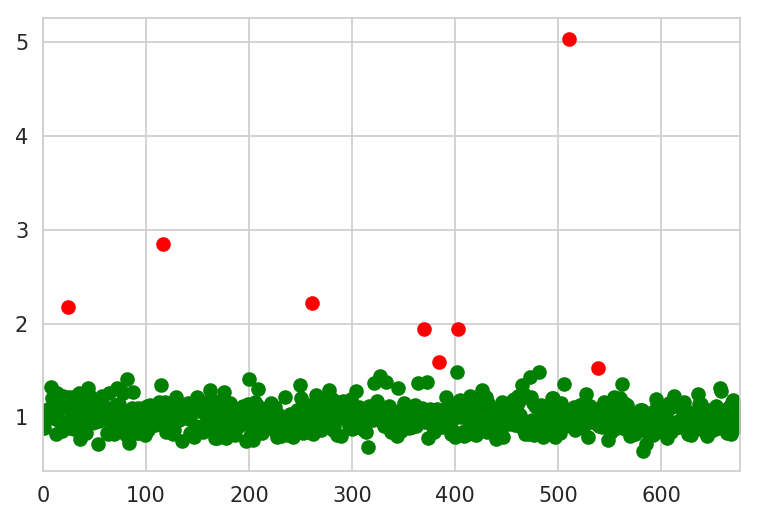

In [0]:
outliers_cluster = kmeans(train1,2,800,1.5)

In [0]:
outliers_cluster

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,image class_airplane,image class_boat,image class_cake,image class_cartoon,image class_cat,image class_dog,image class_flower,image class_llama,image class_mountain,image class_person
24,-0.502342,-0.967347,-0.214062,-0.073790,-0.699107,0.828970,0.113615,0.093891,0.054702,1.288775,9.597036,-0.944741,1.363090,0.226815,0.773124,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,2.899009,-0.393442,-0.250207,-0.380862,-0.305631
117,-0.626004,1.032230,0.857443,-0.342345,-1.051391,0.978897,0.325013,0.105719,0.705753,-1.076828,12.958368,-0.944741,1.363090,-1.180801,0.964716,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,2.537919,-0.250207,-0.380862,-0.305631
261,-0.685129,1.032230,0.980978,-0.061278,-0.726970,0.235619,-0.008904,0.105506,-0.072346,0.535088,8.993695,1.056929,1.363090,0.521909,0.080984,-0.336353,-0.355049,-0.375773,4.906684,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
385,0.008550,-0.967347,0.156438,-0.409266,0.538266,2.588063,-2.432268,0.105469,-0.685625,-0.533162,4.332563,-0.944741,1.363090,-0.851373,3.386641,2.968681,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
511,-0.386962,-0.967347,-0.327470,-1.020637,1.324380,0.628047,-2.079043,-23.567743,1.200698,0.784579,-0.333705,1.056929,1.363090,-0.100522,0.526710,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,3.990799,-0.380862,-0.305631
539,-0.419887,-0.967347,-0.453490,-0.881279,-0.255743,0.217906,-0.384525,0.061633,2.459730,-1.420667,5.182715,-0.944741,1.363090,1.155816,0.062009,-0.336353,-0.355049,-0.375773,-0.203503,2.833398,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
370,-0.483133,-0.967347,0.979630,0.099859,-1.116488,-1.128898,-0.215400,-7.954316,2.631641,1.359227,-0.366318,1.056929,-0.732545,1.092693,-1.070789,-0.336353,-0.355049,-0.375773,-0.203503,-0.352413,-0.344437,-0.393442,-0.250207,2.621749,-0.305631
403,-0.594408,1.032230,1.733118,0.043883,1.748862,-1.138788,0.105162,0.090698,0.038611,1.075541,8.199237,1.056929,-0.732545,0.922881,-1.076742,-0.336353,-0.355049,-0.375773,-0.203503,2.833398,-0.344437,-0.393442,-0.250207,-0.380862,-0.305631
